## Imports

In [1]:
import numpy as np 
import pandas as pd
from PyUtils import MyPyUtils as utils
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [2]:
filePath = "churn_0_Raw.csv"
df_raw = pd.read_csv(filePath, index_col=False)
utils.writeDFToFile(df_raw, "df_info_0_Raw.txt")
print(df_raw.columns)
df_raw


Complete details in df_info_0_Raw.txt file
Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


# Remove features
Remove data that is too granular

In [3]:
#Remove granular columns
df_raw_reduced = df_raw.drop(columns=['CaseOrder','Customer_id', 'Interaction', 'UID', 'City', 'State', 
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
print(df_raw_reduced.shape)
df_raw_reduced.info()
utils.writeDFToFile(df_raw_reduced, "df_info_1_Reduced.txt")
df_raw_reduced.to_csv('churn_1_Reduced.csv')
df = df_raw_reduced

# Clear variables
del df_raw

(10000, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet  

# Data standardization
Scale numeric data into [-1,1] range

In [4]:
# https://www.w3schools.com/python/python_ml_scale.asp
 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

numeric_columns_array = df.select_dtypes(include=['int64','float64']).columns.to_list()

# Scale numeric data
a_ndarray = sc_x.fit_transform(df[numeric_columns_array]) 

# Transform array into a Data Frame
df_standardized = pd.DataFrame(a_ndarray, columns=numeric_columns_array)

# Remove numeric columns from DF
df_auxiliar = df.drop(numeric_columns_array, axis='columns')

# Merge standardized colums to DF
df = pd.merge(df_standardized, df_auxiliar, left_index=True, right_index=True)

print(df.shape)
df.info()
utils.writeDFToFile(df, "df_info_2_Standardized.txt")

# Clear variables
del sc_x, a_ndarray, df_standardized, df_auxiliar
  

(10000, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Children              10000 non-null  float64
 2   Age                   10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Email                 10000 non-null  float64
 6   Contacts              10000 non-null  float64
 7   Yearly_equip_failure  10000 non-null  float64
 8   Tenure                10000 non-null  float64
 9   MonthlyCharge         10000 non-null  float64
 10  Bandwidth_GB_Year     10000 non-null  float64
 11  Area                  10000 non-null  object 
 12  Marital               10000 non-null  object 
 13  Gender                10000 non-null  object 
 14  Churn                 10000 non-null  object 
 15  Techie  

# Data Encoding 
Convert Categorical into binary

In [5]:
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
print("\nCategorical features")
print(categorical_features)
print("\n")

df = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)
df.info()
utils.writeDFToFile(df, "df_info_3_Encoded.txt")


Categorical features
['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                                    10000 non-null  float64
 3   Income                                 10000 non-null  float64
 4   Outage_sec_perweek                     10000 non-null  float64
 5   Email                                  10000 non-null  float64
 6   Contacts                               10000 non-null 

# Fix Data Types
Change uint8 type to int64

In [6]:
uint8_columns_array = df.select_dtypes(include=['uint8']).columns.to_list()
print(uint8_columns_array)

for item in uint8_columns_array:
    # convert Dtype from 'int64' to 'object'
    df[item] = df[item].astype('int64')


print("\n")
df.info()
utils.writeDFToFile(df, "df_info_4_DataTypeFixed.txt")
df.to_csv('churn_2_Transformed.csv')

# Clear variables
del uint8_columns_array, item


['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                  

# Summary Statistics

In [7]:
# Summary for Numerical data
df_raw_reduced.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [8]:
# Summary for categorial data
categorical_summary = df_raw_reduced.describe(include='object')
categorical_summary.to_csv("univariate_categorical_summary.csv")
categorical_summary

,Area,Marital,Gender,Churn,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,5,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,Suburban,Divorced,Female,No,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,No,No,No,No,No,Yes,Electronic Check
freq,3346,2092,5025,7350,8321,5456,5166,7009,4408,9067,5392,6424,5494,5614,6250,5071,5110,5882,3398


# Sampling Data

In [9]:
# 80% Trainig sample , 30% Test sample
target = 'Churn_Yes'
Y = df[target] #target
X = df.drop(target, axis=1) #Predictors
split_by = Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=split_by)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (7000, 38)
y_train: (7000,)
x_test: (3000, 38)
y_test: (3000,)


## Logistic Regression


Y_formula
y = [-2.05698823] + 0.005*Population + 0.042*Children + 0.0029*Age + 0.0163*Income + -0.0234*Outage_sec_perweek + -0.0683*Email + 0.0273*Contacts + 0.0157*Yearly_equip_failure + -1.9484*Tenure + 1.8301*MonthlyCharge + -1.0168*Bandwidth_GB_Year + -0.0222*Area_Suburban + 0.0761*Area_Urban + 0.1298*Marital_Married + 0.0032*Marital_Never Married + 0.2005*Marital_Separated + 0.2703*Marital_Widowed + 0.2072*Gender_Male + 0.0075*Gender_Nonbinary + 1.1414*Techie_Yes + -3.2662*Contract_One year + -3.4048*Contract_Two Year + 0.139*Port_modem_Yes + -0.0913*Tablet_Yes + -2.3779*InternetService_Fiber Optic + -1.0123*InternetService_None + -0.1992*Phone_Yes + 0.339*Multiple_Yes + -0.1573*OnlineSecurity_Yes + -0.1323*OnlineBackup_Yes + -0.1007*DeviceProtection_Yes + -0.2031*TechSupport_Yes + 1.1393*StreamingTV_Yes + 1.2147*StreamingMovies_Yes + 0.13*PaperlessBilling_Yes + 0.2711*PaymentMethod_Credit Card (automatic) + 0.6256*PaymentMethod_Electronic Check + 0.3031*PaymentMethod_Mailed Chec

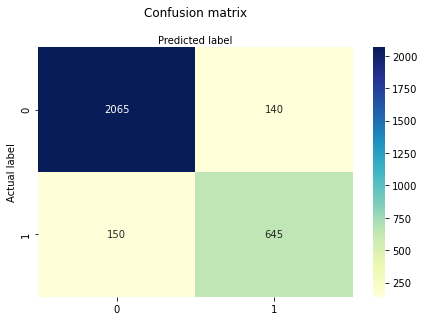

In [10]:
model1 = LogisticRegression(solver='lbfgs', max_iter=500)
model1.fit(x_train, y_train)

# print("\ncoef_")
# print(model.coef_[0])
coefs_dict = dict(zip(x_train.columns, model1.coef_[0]))
# rounded_coefs = {key: round(value, 4) for key, value in coefs_dict.items()}
# print(rounded_coefs)

# print("\nintercept_")
# print(model1.intercept_)

# Print y formula
y_formula = "y = " + str(model1.intercept_) + " + "
for key, value in coefs_dict.items():
    y_formula += f"{round(value,4)}*{key} + "
print("\nY_formula")
print(y_formula)

print("\nscore_")
score = model1.score(x_test, y_test)
print(score)

y_predicted = model1.predict(x_test)
print("\ny_predict")
print(y_predicted)

print("\ny_predict_proba")
y_predicted_proba = model1.predict_proba(x_test)
print(y_predicted_proba)

print("\n TP | FP \nFN | TN \n")
cm1 = confusion_matrix(y_test, y_predicted)
utils.plot_confusion_matrix(cm1)

ROC AUC Score: 0.9628374620288368


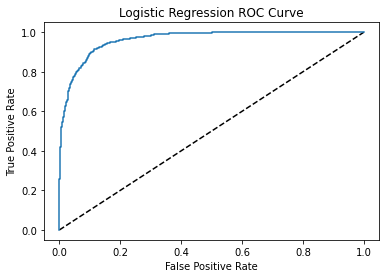

In [11]:
from sklearn.metrics import roc_auc_score
my_roc_auc_score1 = roc_auc_score(y_test, y_predicted_proba[:,1])
print("ROC AUC Score: "+ str(my_roc_auc_score1))
utils.plot_roc_curve(model1,x_test,y_test)

Accuracy = TP+TN / TP+TN+FP+FN
<br>Precision = TP / TP+FP
<br>Recal = TP / TP+FN
<br>F1-score = 2 * (Precision*Recal) / (Precision+Recal)

In [12]:
print("\nClassification Report")
report1 = classification_report(y_test,y_predicted)
print(report1)


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2205
           1       0.82      0.81      0.82       795

    accuracy                           0.90      3000
   macro avg       0.88      0.87      0.88      3000
weighted avg       0.90      0.90      0.90      3000



## Feature Selection

In [13]:
import statsmodels.api as sm
# Fit the model using maximum likelihood
logit_model = sm.Logit(y_train, x_train).fit()
print(logit_model.summary())

with open('statsmodels_logit_summary_1.txt', 'w') as fh:
        fh.write(logit_model.summary().as_text())     
        print("\nModel summary saved on statsmodels_logit_summary_1.txt")  

Optimization terminated successfully.
         Current function value: 0.219809
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6962
Method:                           MLE   Df Model:                           37
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.6199
Time:                        22:26:11   Log-Likelihood:                -1538.7
converged:                       True   LL-Null:                       -4047.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Population                                0.0056      

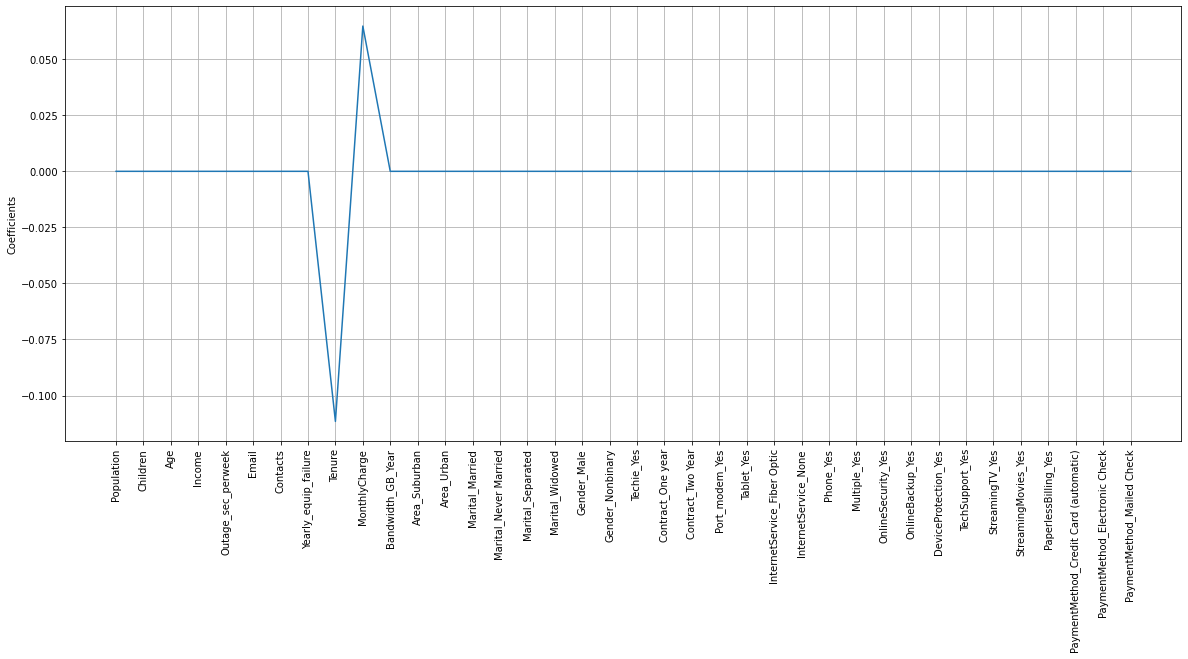

In [14]:
x = x_train
y = y_train
candidates_columns = X.columns
utils.lasso_for_feature(x, y, candidates_columns)

## Clean Data
Removing columns not relevant for this analysis.

In [15]:
x_train.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')

In [16]:
columns_to_remove = ['Population','Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
                     'Yearly_equip_failure', 'Area_Suburban', 'Area_Urban', 'Marital_Married','Marital_Never Married', 
                     'Marital_Separated', 'Marital_Widowed', 'Gender_Nonbinary', 'Port_modem_Yes', 'Tablet_Yes', 
                     'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
                     'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check']

x_train_reduced = x_train.drop(columns=columns_to_remove)
x_test_reduced = x_test.drop(columns=columns_to_remove)

print(x_train_reduced.shape)
print(x_train_reduced.columns)

(7000, 15)
Index(['Children', 'Age', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Gender_Male', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'InternetService_Fiber Optic', 'InternetService_None',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Electronic Check'],
      dtype='object')


In [17]:
import statsmodels.api as sm
# Fit the model using maximum likelihood
logit_model_2 = sm.Logit(y_train, x_train_reduced).fit()
print(logit_model_2.summary())

with open('statsmodels_logit_summary_2.txt', 'w') as fh:
        fh.write(logit_model_2.summary().as_text())     
        print("\nModel summary saved on statsmodels_logit_summary_2.txt")  

Optimization terminated successfully.
         Current function value: 0.222249
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6985
Method:                           MLE   Df Model:                           14
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                  0.6156
Time:                        22:26:11   Log-Likelihood:                -1555.7
converged:                       True   LL-Null:                       -4047.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Children                           0.4423      0.063      6.981     

## Logistic Regression (Refined Model)


coef_
{'Children': 0.0594, 'Age': -0.0222, 'Tenure': -1.2215, 'MonthlyCharge': 1.9881, 'Bandwidth_GB_Year': -1.7277, 'Gender_Male': 0.2414, 'Techie_Yes': 1.1207, 'Contract_One year': -3.2353, 'Contract_Two Year': -3.3611, 'InternetService_Fiber Optic': -2.5656, 'InternetService_None': -1.066, 'TechSupport_Yes': -0.2553, 'StreamingTV_Yes': 1.0147, 'StreamingMovies_Yes': 1.0395, 'PaymentMethod_Electronic Check': 0.4197}

intercept_
[-1.53512056]

Y_formula
y = -1.54 + 0.06*Children + -0.02*Age + -1.22*Tenure + 1.99*MonthlyCharge + -1.73*Bandwidth_GB_Year + 0.24*Gender_Male + 1.12*Techie_Yes + -3.24*Contract_One year + -3.36*Contract_Two Year + -2.57*InternetService_Fiber Optic + -1.07*InternetService_None + -0.26*TechSupport_Yes + 1.01*StreamingTV_Yes + 1.04*StreamingMovies_Yes + 0.42*PaymentMethod_Electronic Check + 

score_
0.901

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2205
           1       0.82  

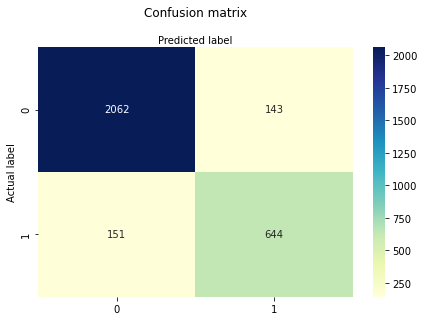

ROC AUC Score: 0.9629127625893124


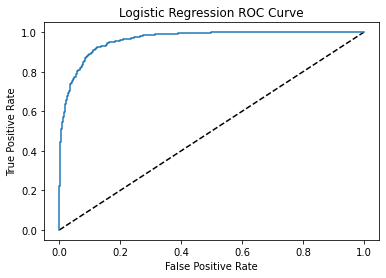

In [22]:
model_final = LogisticRegression(solver='lbfgs', max_iter=500)
model_final.fit(x_train_reduced, y_train)

print("\ncoef_")
# print(model.coef_[0])
coefs_dict = dict(zip(x_train_reduced.columns, model_final.coef_[0]))
rounded_coefs = {key: round(value, 4) for key, value in coefs_dict.items()}
print(rounded_coefs)

print("\nintercept_")
print(model_final.intercept_)

y_formula = "y = " + f"{round(model_final.intercept_[0],2)}" + " + "
for key, value in coefs_dict.items():
    y_formula += f"{round(value,2)}*{key} + "
print("\nY_formula")
print(y_formula)

print("\nscore_")
score = model_final.score(x_train_reduced, y_train)
print(score)

y_predicted = model_final.predict(x_test_reduced)
y_predicted_proba = model_final.predict_proba(x_test_reduced)

print("\nClassification Report")
report2 = classification_report(y_test,y_predicted)
print(report2)

print("TP | FP \nFN | TN \n")
cm2 = confusion_matrix(y_test, y_predicted)
utils.plot_confusion_matrix(cm2)

my_roc_auc_score2 = roc_auc_score(y_test, y_predicted_proba[:,1])
print("ROC AUC Score: "+ str(my_roc_auc_score2))
utils.plot_roc_curve(model_final,x_test_reduced,y_test)


In [19]:

feature_names = x_train_reduced.columns
feature_importance = (
	pd.DataFrame({
		'variable': feature_names,
        'coefficient': model_final.coef_[0],
		'coefficient_unsigned': abs(model_final.coef_[0]) #Transform into unsigned
	})
    .round(decimals=4)
	.sort_values('coefficient_unsigned', ascending=False ,)
	.style.bar(color=['red','green'], align='zero')
)
feature_importance

,variable,coefficient,coefficient_unsigned
8,Contract_Two Year,-3.361100,3.361100
7,Contract_One year,-3.235300,3.235300
9,InternetService_Fiber Optic,-2.565600,2.565600
3,MonthlyCharge,1.988100,1.988100
4,Bandwidth_GB_Year,-1.727700,1.727700
2,Tenure,-1.221500,1.221500
6,Techie_Yes,1.120700,1.120700
10,InternetService_None,-1.066000,1.066000
13,StreamingMovies_Yes,1.039500,1.039500
12,StreamingTV_Yes,1.014700,1.014700
